# Diffusion in 1-dimension and application to FRAP

This exercise was generated from a Jupyter notebook. You can download the notebook [here](diffusion_1d_and_FRAP.ipynb).

In [Exercise 2](diffusion_via_coin_flips.html) we used a random number generator to obtain stochastic trajectories of diffusive walkers. By overlaying lots of such trajectories, we got intuition about the evolution of the probability distribution of walker's position.

In this tutorial, we will use numerical methods to estimate the probability distributions directly from the diffusion equation given by

\begin{align}
p(n,t + \Delta t) = p(n, t) + k \, \Delta t p(n-1, t) + k \, \Delta t p(n+1, t) - 2k \, \Delta t p(n,t).
\end{align}

This equation, called "the master equation," allows us to calculate the probability of the walker being at position $n$ at the next time step, given the probabilites at the current time step. $k$ is the hopping rate between neighboring positions, and $\Delta t$ is the time step used in the numerical calculation.

The master equation at the boundaries is slighly modified and is given by

\begin{align}
p(0,t + \Delta t) &= p(0, t) + k \, \Delta t p(1, t) - k \, \Delta t p(0,t), \\
p(N,t + \Delta t) &= p(N, t) + k \, \Delta t p(N-1, t) - k \, \Delta t p(N,t),
\end{align}

where $N$ is the index of the rightmost position.

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Import the utilities file
import pboc_utilities as pboc

### Unconstrained diffusion

In the first part of the tutorial, we will initialize the walker at the middle and observe the dynamics of the distribution of its position over time.

To do that, we specify the number of boxes, the time increment, the number of time steps and the hopping rate. In general, the time increment needs to be smaller than the hopping timescale to ensure accurate estimations.

In [4]:
# Number of boxes
n_boxes = 40

# Time increment (Delta t) in seconds
dt = 0.1

# Number of steps
n_steps = 100

# Hopping rate constant (k) in sec^-1
k = 1

We create a 2-dimensional `numpy` array to store the probabilities at different time points, initialize the walker at the middle and solve the master equation iteratively, by using the probabilities at the previous time step to evaluate those at the current time step.

In [11]:
# Initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# Initial position
x0 = n_boxes // 2

p[x0, 0] = 1

# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(n_steps - 1):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t+1] = p[n,t] + k*dt*p[n-1,t] + k*dt*p[n+1,t]  \
                          - 2*k*dt*p[n,t]

    # Boundary cases
    p[0,t+1] = p[0,t] + k*dt*p[1,t] - k*dt*p[0,t]
    
    # p[-1,t] chooses the last row and the t-th column
    p[-1, t+1] = p[-1, t] + k*dt*p[-2,t] - k*dt*p[-1, t]

To display the probabilities at different points in time, we will use the custom-written `bar_plot` function in the [`pboc_utilities.py`](pboc_utilities.py) utilities file. As inputs, it takes the 2-dimensional probability array `p`, the number of time slices `n_slices`, the time increment `dy` and the axis labels `x_label` and `y_label`.

(<matplotlib.figure.Figure at 0x120a53438>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x120a41dd8>)

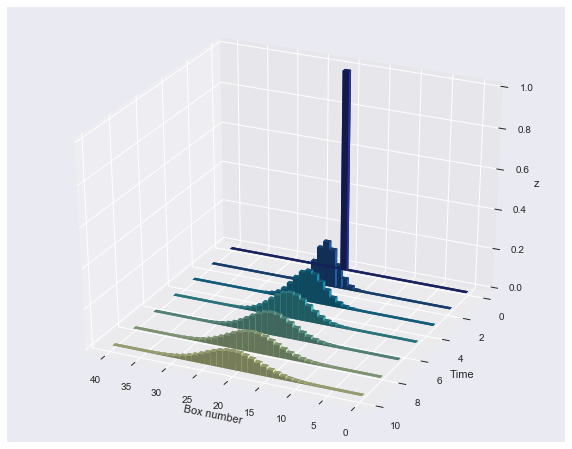

In [10]:
pboc.bar_plot(p, n_slices = 6, dy = dt, x_label='Box number', y_label='Time')

As we can see, as time progresses, the probability distribution becomes wider and remains centered around the original position of the walker.

### FRAP

Having developed the numerical method of integrating the master equation, let's consider its application to the problem of fluorescence recovery after photobleaching (FRAP). In FRAP experiments, the fluorescently labeled molecules initially have a uniform distribution. Applying high intensity light, the fluorescent molecules in the desired region get photobleached, meaning that they no longer fluoresce. Over time, the fluorescent molecules that were outside the photobleached region will diffuse into it, recovering the uniform fluorescence distribution. By estimating the timescale of fluorescence recovery, experimentalists can determine the diffusion constant of fluorescently labeled molecules.

In this part of the tutorial we will implement the 1-dimensional version of the FRAP experiment. We will initialize the probability distribution as zero in the middle region and uniform outside it. We will when observe the process of recovery as the gap gets "filled" with probability from the two flanking regions.

In [12]:
# Number of time steps
n_steps = 1000

# Time increment in seconds
dt = 0.2

# Initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# ---------- FRAP initialization ----------
# Assign non-zero values
p[:,0] = 1

# Photobleaching
start = n_boxes // 4
end = 3*n_boxes // 4
p[start:end,0] = 0

# Normalization
p[:,0] = p[:,0] / np.sum(p[:,0])

# ------------------------------------------

# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(n_steps - 1):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t+1] = p[n,t] + k*dt*p[n-1,t] + k*dt*p[n+1,t]  \
                          - 2*k*dt*p[n,t]

    # Boundary cases
    p[0,t+1] = p[0,t] + k*dt*p[1,t] - k*dt*p[0,t]
    p[-1, t+1] = p[-1, t] + k*dt*p[-2,t] - k*dt*p[-1, t]

Now let's use the utility function `bar_plot` to show the process of recovery.

(<matplotlib.figure.Figure at 0x1217a9ac8>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1214b12e8>)

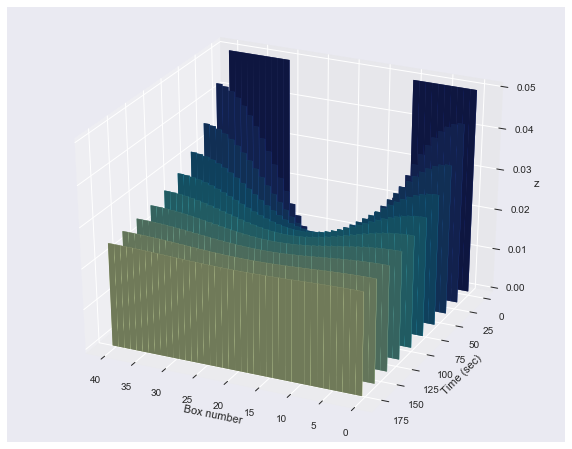

In [14]:
pboc.bar_plot(p, n_slices = 10, dy = dt, x_label='Box number', y_label='Time (sec)')